In [2]:
import numpy as np 
from numpy import random
import pandas as pd 
import seaborn as sns
import random
import scipy 
from scipy.stats import chi2

#### 1. Spherical case

In [3]:
N=4000; M=6 # N = size of the random vectors we wish to generate M = number of random vectors to generate
Y = np.random.randn(N,M) ;
normY = np.sqrt(np.diag(Y.T@Y))
matNormY = np.tile(normY.T,(N,1))
U = Y/matNormY

#####  Simulate R where $R^2 \sim Gamma(k,\theta)$
$p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$

where $k$ is the shape and $\theta$ the scale, and $\Gamma$ is the Gamma function.


/Users/macbookpro/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


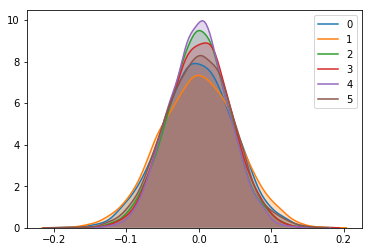

In [4]:
#Si nous voulons avoir les meme variance de Kotz, on doit simuler une seul observation de R 
k= M/2+1; theta= 2;
R=np.sqrt(np.random.gamma(k, theta, M));
#R =  np.sqrt(chi2.rvs(1, size=M))  # cas gaussien

X = U*np.tile(R.T,(N,1));


data = pd.DataFrame(X);
for col in range(0,M):
    sns.kdeplot(data.iloc[:,col], shade=True);

/Users/macbookpro/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


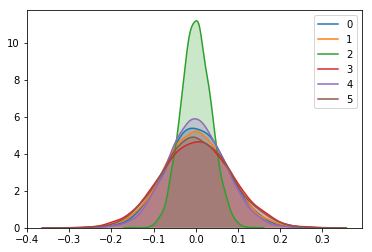

In [5]:
Sigma= np.zeros((M,M))
rho=0.9
for ii in range(0,M):
    for jj in range(0,M):
        Sigma[ii,jj] = rho**abs(ii-jj)

Sigma= np.zeros((M,M))
rho=0.9
for ii in range(0,M):
    for jj in range(0,M):
        Sigma[ii,jj] = rho**abs(ii-jj)  

e =np.random.rand(M,M)
Sigma= np.dot(e.T,e)  
#Sigma= np.identity(M)

L, R = np.linalg.eig(Sigma)
R@np.diag(L)@R.T
A=np.diag(L**.5)@R.T

Z=np.zeros((M,N))
for i in range(0,N):
    Z[:,i]=A.T@X.T[:,i]
Z=Z.T

data2 = pd.DataFrame(Z);
for col in range(0,M):
    sns.kdeplot(data2.iloc[:,col], shade=True);

#### Graphique cas Gaussien

/Users/macbookpro/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


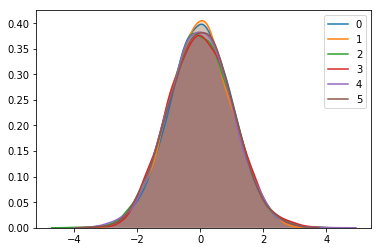

In [6]:
#Sigma=np.identity(M)

e =np.random.rand(M,M)
Sigma= np.dot(e.T,e)
Sigma= np.identity(M)
Mean=np.zeros(M)
E = np.random.multivariate_normal(Mean, Sigma, N)


data3 = pd.DataFrame(E);
for col in range(0,M):
    sns.kdeplot(data3.iloc[:,col], shade=True);

#### Graphique Student par melange

/Users/macbookpro/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


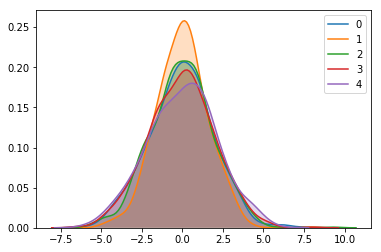

In [35]:
# Ce code est bon je l'ai verifier.
# Lorsque Simga= I_m la Student (les variable colonne) semble avoir des variance diffirente cequi est surprenent
ddl=5
M=5
N=1000
IG = 1/np.random.gamma(ddl/2,2/ddl, 1)
ZZ=np.tile(np.power(IG,.5),(N, M))
XX=np.random.multivariate_normal(np.zeros(M), np.identity(M), N)
EE= np.multiply(XX,ZZ)


e =np.random.rand(M,M)
Sigma= np.dot(e.T,e)  
#Sigma= np.identity(M)

L, R = np.linalg.eig(Sigma)
R@np.diag(L)@R.T
A=np.diag(L**.5)@R.T

Z=np.zeros((M,N))
for i in range(0,N):
    Z[:,i]=A.T@EE.T[:,i]
Z=Z.T


data5 = pd.DataFrame(Z);
for col in range(0,M):
    sns.kdeplot(data5.iloc[:,col], shade=True);

In [186]:
np.var(Z[:,0])

1.4521700491199345

In [24]:
Sigma

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [43]:
Sigma= np.zeros((M,M))
rho=0.9
for ii in range(0,M):
    for jj in range(0,M):
        Sigma[ii,jj] = rho**abs(ii-jj)  
e =np.random.rand(M,M)
Sigma= np.dot(e.T,e)  

        
L, R = np.linalg.eig(Sigma)
Sigma05= R@np.diag(L**.5)@R.T



In [46]:
Sigma05@Sigma05 == Sigma

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [47]:
np.isclose(Sigma05@Sigma05, Sigma, rtol=1e-05, atol=1e-08, equal_nan=False)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [74]:
Z1=np.zeros((M,N))
for i in range(0,N):
    Z1[:,i]=Sigma05@EE.T[:,i]
Z1=Z.T

In [75]:
Z2=np.zeros((N,M))
for i in range(0,N):
    Z2[i,:]=EE[i,:]@Sigma05

In [78]:
np.isclose(Z2, Z1, rtol=1e-10, atol=1e-10, equal_nan=False)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [99]:
N=10000
E=np.random.multivariate_normal(np.zeros(M), Sigma, N)

EE=np.random.multivariate_normal(np.zeros(M), np.identity(M), N)
Z1=np.zeros((M,N))

for i in range(0,N):
    Z1[:,i]=Sigma05@EE.T[:,i]
Z1=Z.T

Z2=np.zeros((N,M))
for i in range(0,N):
    Z2[i,:]=EE[i,:]@Sigma05

In [105]:
np.shape(E)

(10000, 5)

In [108]:
(1/N)*(E.T@E)

array([[2.52696868, 1.15180316, 1.33551823, 2.09010149, 1.57274229],
       [1.15180316, 0.73475134, 0.51967347, 1.0490185 , 0.61913911],
       [1.33551823, 0.51967347, 1.25639921, 1.31346369, 0.75262105],
       [2.09010149, 1.0490185 , 1.31346369, 1.98581404, 1.25471672],
       [1.57274229, 0.61913911, 0.75262105, 1.25471672, 1.09613678]])

In [110]:
Sigma

array([[2.50947351, 1.13584777, 1.33605122, 2.07104197, 1.56211882],
       [1.13584777, 0.72480372, 0.51236973, 1.03468295, 0.61157551],
       [1.33605122, 0.51236973, 1.25510875, 1.30727568, 0.75631829],
       [2.07104197, 1.03468295, 1.30727568, 1.96442515, 1.24323228],
       [1.56211882, 0.61157551, 0.75631829, 1.24323228, 1.08545931]])

In [114]:
(1/N)*(Z2.T@Z2)

array([[2.52700118, 1.14981584, 1.34662635, 2.0873258 , 1.56620009],
       [1.14981584, 0.73109502, 0.51811017, 1.04238288, 0.6184087 ],
       [1.34662635, 0.51811017, 1.25782023, 1.31293498, 0.76136925],
       [2.0873258 , 1.04238288, 1.31293498, 1.97326454, 1.2513325 ],
       [1.56620009, 0.6184087 , 0.76136925, 1.2513325 , 1.08346656]])

In [115]:
(1/N)*(Z1.T@Z1)

array([[0.39481552, 0.23152105, 0.29868604, 0.35686518, 0.30440763],
       [0.23152105, 0.25307436, 0.29345459, 0.27043146, 0.2431763 ],
       [0.29868604, 0.29345459, 0.36459337, 0.31381049, 0.31349026],
       [0.35686518, 0.27043146, 0.31381049, 0.41039301, 0.37372474],
       [0.30440763, 0.2431763 , 0.31349026, 0.37372474, 0.45761561]])

In [124]:

L, R = np.linalg.eig(Sigma)
R@np.diag(L)@R.T
A=np.diag(L**.5)@R.T

EE=np.random.multivariate_normal(np.zeros(M), np.identity(M), N)
E=np.zeros((N,M))
for i in range(0,N):
    E[i,:]=EE[i,:]@Sigma05


np.isclose((1/N)*(E.T@E), Sigma, rtol=1e-1,  equal_nan=False)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [119]:
(1/N)*(E.T@E)

array([[2.50842779, 1.14415653, 1.34086822, 2.07814464, 1.55199066],
       [1.14415653, 0.73475278, 0.51511474, 1.04341356, 0.61120109],
       [1.34086822, 0.51511474, 1.27199278, 1.31750308, 0.75292523],
       [2.07814464, 1.04341356, 1.31750308, 1.97456303, 1.23840862],
       [1.55199066, 0.61120109, 0.75292523, 1.23840862, 1.07429691]])

In [120]:
Sigma

array([[2.50947351, 1.13584777, 1.33605122, 2.07104197, 1.56211882],
       [1.13584777, 0.72480372, 0.51236973, 1.03468295, 0.61157551],
       [1.33605122, 0.51236973, 1.25510875, 1.30727568, 0.75631829],
       [2.07104197, 1.03468295, 1.30727568, 1.96442515, 1.24323228],
       [1.56211882, 0.61157551, 0.75631829, 1.24323228, 1.08545931]])